<a href="https://colab.research.google.com/github/jyoon0319/2023S/blob/main/Youtube_API_Crawling_by_lg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#유튜브 api 라이브러리 불러오기
!pip install google-api-python-client

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas
from googleapiclient.discovery import build

import warnings # 경고창 무시
warnings.filterwarnings('ignore')

In [4]:
#비디오 아이디 찾기 
import urllib.parse

url = "https://www.youtube.com/watch?v=614jiKgMhwg&t=2s"
parsed_url = urllib.parse.urlparse(url)
video_id = urllib.parse.parse_qs(parsed_url.query).get("v")
if video_id:
    video_id = video_id[0]
    
print(video_id)

614jiKgMhwg


In [5]:
# API 키: ~~
#영어 Video link: https://www.youtube.com/watch?v=614jiKgMhwg&t=2s
# videoId: 614jiKgMhwg
comments = list()
#api_obj = build('youtube', 'v3', developerKey='API키')
api_obj = build('youtube', 'v3', developerKey='~~')
#response = api_obj.commentThreads().list(part='snippet,replies', videoId='video id', maxResults=100).execute()
response = api_obj.commentThreads().list(part='snippet,replies', videoId='614jiKgMhwg', maxResults=100).execute()


In [6]:
# 댓글수집하기
while response:
    for item in response['items']:
        comment = item['snippet']['topLevelComment']['snippet']
        comments.append([comment['textDisplay'], comment['authorDisplayName'], comment['publishedAt'], comment['likeCount']])
 
        if item['snippet']['totalReplyCount'] > 0:
            for reply_item in item['replies']['comments']:
                reply = reply_item['snippet']
                comments.append([reply['textDisplay'], reply['authorDisplayName'], reply['publishedAt'], reply['likeCount']])
 
    if 'nextPageToken' in response:
        response = api_obj.commentThreads().list(part='snippet,replies', videoId='614jiKgMhwg', pageToken=response['nextPageToken'], maxResults=100).execute()
    else:
        break

#언어별 엑셀로 저장하기

In [7]:
df = pandas.DataFrame(comments)

# Separate different language into different spread sheets
# Installation
import pandas as pd
! pip install langdetect
from langdetect import detect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 39.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993224 sha256=a2717612799b631b968f4d6d741fdf839d7b13f2491481fc548c0b0c0b865822
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [8]:
df.head()

,0,1,2,3
0,Could be a much devotion and respect to your m...,RP tour & food vlog,2023-05-29T17:51:55Z,0
1,Sadly his people distrust his relationship wit...,Mike Russell,2023-05-21T07:44:31Z,0
2,Hello im korean!<br>He was able to be presiden...,Balthasar,2023-05-30T06:50:57Z,0
3,99% All south korean men go to military and we...,junni,2023-05-21T02:49:59Z,1
4,is he very much like an ship ? !?? to usa ...,siouxiez,2023-05-19T19:35:40Z,0


In [10]:
# df[0] 언어탐지하여 나눠서 저장
english_comments = []
korean_comments = []
other_comments = []

for comment in df[0]:
    try:
        language = detect(comment)
        if language == 'en':
            english_comments.append([comment])  # Wrap the comment in a list
        elif language == 'ko':
            korean_comments.append([comment])  # Wrap the comment in a list
        else:
            other_comments.append([comment])  # Wrap the comment in a list
    except:
        other_comments.append([comment])  # Wrap the comment in a list

In [11]:
english_comments

[['Could be a much devotion and respect to your mother tongue, if it was uttered in American congress.'],
 ['Sadly his people distrust his relationship with US - they want reunification, just like Germany'],
 ['Hello im korean!<br>He was able to be president because there were a lot of people who supported him !'],
 ['99% All south korean men go to military and we Ready to fight for usa and korea.<br>Without usa, my family no long exist by north korea and china in 1953'],
 ['is he very much like an ship ?   !??  to usa   when i like ead i will if not the moment i will  keep at aci palace.'],
 ['North Korea has every right to defend itself against the Western colonizers of the U.S and Nato.'],
 ['The people of the Republic of Korea will never forget the efforts of hundreds of thousands of young Americans who sacrificed themselves to defend democracy. thank you! God bless our great alliance'],
 ['Korean President is good at talking to please the US , all the best Ajushi'],
 ['God bless t

In [12]:
# Create a new Excel file
excel_file = pd.ExcelWriter('comments.xlsx')

# Save English comments in a sheet named 'English'
df_english = pd.DataFrame(english_comments, columns=['textDisplay'])
df_english.to_excel(excel_file, sheet_name='English', index=False)

# Save Korean comments in a sheet named 'Korean'
df_korean = pd.DataFrame(korean_comments, columns=['textDisplay'])
df_korean.to_excel(excel_file, sheet_name='Korean', index=False)

# Save comments in other languages in a sheet named 'Other Languages'
df_other = pd.DataFrame(other_comments, columns=['textDisplay'])
df_other.to_excel(excel_file, sheet_name='Other Languages', index=False)

# Save the Excel file
excel_file.save()

#워드클라우드

In [16]:
!pip install wordcloud
!pip install wordcloud nltk
import nltk
import pandas as pd
import os
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
nltk.download("punkt")
nltk.download('stopwords')
from nltk.tokenize import word_tokenize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


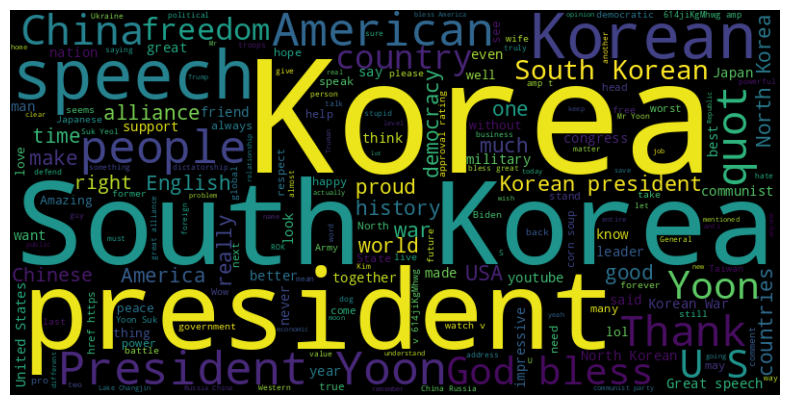

In [18]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

# 엑셀 파일 읽기
#df = pd.read_excel('파일경로.xlsx', sheet_name='시트이름')
df = pd.read_excel('/content/comments.xlsx', sheet_name='English')

# 특정 열 선택
#column_data = df['열이름']
column_data = df['textDisplay']

# 워드클라우드용 텍스트 데이터
text = ""

# 텍스트 데이터 생성
for data in column_data:
    text += str(data) + " "

# 불용어 제거 # Remove stop words, words less than 2 letters, and "br"
# Remove stop words
stop_words = set(stopwords.words('english'))  # You can change 'english' to the language you want
tokens = word_tokenize(text)
filtered_tokens = [token for token in tokens if token.lower() not in stop_words and len(token) > 2 and token.lower() != 'br']
filtered_text = ' '.join(filtered_tokens)


# 워드클라우드 생성
wordcloud = WordCloud(width=800, height=400).generate(filtered_text)

# 워드클라우드 플롯 생성
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#토픽모델링 (chp 7... )

1. 영어

In [27]:

#Gensim에서는 토큰화된 결과를 texts로 지정해야 함
# Tokenize the text data
tokenized_texts = [word_tokenize(text) for text in filtered_tokens]



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [28]:
from gensim.corpora.dictionary import Dictionary

# 토큰화 결과로부터 dictionay 생성
dictionary = Dictionary(tokenized_texts)
print('#Number of initial unique words in documents:', len(dictionary))

# 문서 빈도수가 너무 적거나 높은 단어를 필터링하고 특성을 단어의 빈도 순으로 선택
dictionary.filter_extremes(keep_n = 2000, no_below=5, no_above=0.5)
print('#Number of unique words after removing rare and common words:', len(dictionary))

# 카운트 벡터로 변환
corpus = [dictionary.doc2bow(text) for text in tokenized_texts]
print('#Number of unique tokens: %d' % len(dictionary))
print('#Number of documents: %d' % len(corpus))

#Number of initial unique words in documents: 2640
#Number of unique words after removing rare and common words: 244
#Number of unique tokens: 244
#Number of documents: 6678


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [29]:
from gensim.models import LdaModel

num_topics = 10
passes = 5
%time model = LdaModel(corpus=corpus, id2word=dictionary,\
                       passes=passes, num_topics=num_topics, \
                       random_state=7)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


CPU times: user 2.6 s, sys: 32 ms, total: 2.63 s
Wall time: 2.63 s


In [30]:
model.print_topics(num_words=10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.370*"Korea" + 0.102*"God" + 0.087*"much" + 0.085*"people" + 0.042*"freedom" + 0.037*"best" + 0.035*"former" + 0.029*"korean" + 0.025*"times" + 0.022*"Yeol"'),
 (1,
  '0.104*"get" + 0.065*"impressive" + 0.064*"free" + 0.061*"think" + 0.058*"..." + 0.049*"address" + 0.046*"person" + 0.044*"together" + 0.040*"many" + 0.040*"want"'),
 (2,
  '0.166*"North" + 0.098*"alliance" + 0.089*"English" + 0.084*"would" + 0.050*"thank" + 0.042*"worst" + 0.042*"military" + 0.039*"ever" + 0.038*"years" + 0.036*"south"'),
 (3,
  '0.219*"president" + 0.157*"lol" + 0.149*"like" + 0.060*"America" + 0.059*"Koreans" + 0.044*"man" + 0.044*"history" + 0.038*"Chinese" + 0.031*"leader" + 0.028*"time"'),
 (4,
  '0.147*"American" + 0.097*"without" + 0.072*"States" + 0.069*"seems" + 0.066*"href=" + 0.065*"world" + 0.063*"really" + 0.057*"lives" + 0.055*"peace" + 0.045*"saying"'),
 (5,
  '0.300*"Yoon" + 0.123*"know" + 0.105*"bless" + 0.066*"korea" + 0.051*"never" + 0.038*"United" + 0.025*"v=614jiKgMhwg" + 0.

In [31]:
#!pip install pyldavis

import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

# feed the LDA model into the pyLDAvis instance
lda_viz = gensimvis.prepare(model, corpus, dictionary)
lda_viz

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9      0.359849 -0.008715       1        1  13.112849
0     -0.095526 -0.358771       2        1  11.931307
3     -0.094193  0.268282       3        1  10.410725
5     -0.070644  0.017905       4        1  10.011930
6     -0.071888  0.018718       5        1   9.742713
2     -0.070636  0.018462       6        1   9.533324
8      0.214623  0.002181       7        1   9.363866
7     -0.063473  0.015502       8        1   9.169425
1     -0.057369  0.014176       9        1   8.670929
4     -0.050743  0.012260      10        1   8.052931, topic_info=          Term        Freq       Total Category  logprob  loglift
20       Korea  148.000000  148.000000  Default  30.0000  30.0000
44        Yoon  101.000000  101.000000  Default  29.0000  29.0000
35      Korean  108.000000  108.000000  Default  28.0000  28.0000
45      speech   80.000000   80.000000  Default  27.0000  27.0000
9    president   77.000000   77.000000  Default  26.0000  26.0000
..         ...         ...         ...      ...      ...      ...
224        old    0.144065    1.004689  Topic10  -7.5330   0.5770
230        may    0.144056    1.004635  Topic10  -7.5330   0.5770
221       give    0.143886    1.003893  Topic10  -7.5342   0.5765
232  different    0.143788    1.003454  Topic10  -7.5349   0.5763
240    chinese    0.143551    1.002359  Topic10  -7.5366   0.5757

[411 rows x 6 columns], token_table=      Topic      Freq                     Term
term                                          
13        1  0.693135                        .
13        7  0.288806                        .
46        9  0.961451                      ...
132       1  0.849049  //www.youtube.com/watch
40       10  0.929053                  Amazing
...     ...       ...                      ...
145       2  0.723846                     work
78       10  0.932354                    world
42        6  0.908255                    worst
158       6  0.976813                    would
205       6  0.919306                    years

[218 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 1, 4, 6, 7, 3, 9, 8, 2, 5])

2. 한국어
https://velog.io/@mare-solis/LDA-%ED%86%A0%ED%94%BD-%EB%AA%A8%EB%8D%B8%EB%A7%81%EC%9C%BC%EB%A1%9C-%EC%BD%98%ED%85%90%EC%B8%A0-%EB%A6%AC%EB%B7%B0%EB%A5%BC-%EB%B6%84%EC%84%9D%ED%95%98%EC%9E%90

# 감정분석
-https://github.com/junkyuhufs/workshop/blob/main/GNU_Session2.ipynb

-"각각의 댓글을 감정 분석하기 위해서는 텍스트 데이터에 대한 감정 분석 모델이 필요합니다. 대표적으로 사용되는 감정 분석 모델 중 하나는 VADER (Valence Aware Dictionary and sEntiment Reasoner)입니다. VADER는 영어 텍스트에 대한 감정 점수를 산출하는 데 사용되는 사전 기반의 모델입니다. 하지만 한국어에 대한 VADER는 직접적으로 제공되지 않습니다."

1. 영어

In [42]:
# 필요한 라이브러리(VADER library) 불러오기
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import sent_tokenize
import nltk
import string
import pandas as pd

# Download the VADER lexicon
nltk.download('vader_lexicon')

# Load the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Define the remove_punctuations function
def remove_punctuations(text):
    # Remove punctuation marks from the text
    text = text.translate(str.maketrans('', '', string.punctuation))
    return text

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [33]:
# 엑셀 파일 읽기
#df = pd.read_excel('파일경로.xlsx', sheet_name='시트이름')
df = pd.read_excel('/content/comments.xlsx', sheet_name='English')
df.info

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<bound method DataFrame.info of                                            textDisplay
0    Could be a much devotion and respect to your m...
1    Sadly his people distrust his relationship wit...
2    Hello im korean!<br>He was able to be presiden...
3    99% All south korean men go to military and we...
4    is he very much like an ship ?   !??  to usa  ...
..                                                 ...
527              may the God bless our great alliance.
528  ​@magic90015  bigger problems are infront of u...
529  @magic90015 you look like a North Korean lol. ...
530                 This speech is similar to zelensky
531  He is the most fraud socio-path, alcoholics of...

[532 rows x 1 columns]>

In [43]:
# Split comments into sentences
sentences = []
for comment in df['textDisplay']:
    sentences.extend(sent_tokenize(comment))

# Create a new DataFrame with the sentences
dfsentiment = pd.DataFrame({'Sentence': sentences})

# Clean punctuation and convert to lowercase
dfsentiment['Sentence'] = dfsentiment['Sentence'].apply(remove_punctuations).apply(lambda x: x.lower())

# Check the first five values
dfsentiment[:5]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Sentence
0,could be a much devotion and respect to your m...
1,sadly his people distrust his relationship wit...
2,hello im koreanbrhe was able to be president b...
3,99 all south korean men go to military and we ...
4,is he very much like an ship


In [44]:
#문장별로 감정분석 점수 부여; Compound, positive, negative, neutral 
# Get intensity scores of each sentence
dfsentiment['Score']=dfsentiment.Sentence.apply(lambda x: sid.polarity_scores(x))

# Place scores in own columns
dfsentiment['CompScore']=dfsentiment.Score.apply(lambda x: x.get("compound"))
dfsentiment['PosScore']=dfsentiment.Score.apply(lambda x: x.get("pos"))
dfsentiment['NegScore']=dfsentiment.Score.apply(lambda x: x.get("neg"))
dfsentiment['NeuScore']=dfsentiment.Score.apply(lambda x: x.get("neu"))

# With scores extracted, the original score field can be removed
dfsentiment = dfsentiment.drop(["Score"], axis=1)

# Adding Sentiment Flags
dfsentiment['PosFlag'] = dfsentiment.CompScore.apply(lambda x: 1 if x >= 0.05 else 0)
dfsentiment['NegFlag'] = dfsentiment.CompScore.apply(lambda x: 1 if x <= -0.05 else 0)
dfsentiment['NeuFlag'] = dfsentiment.CompScore.apply(lambda x: 1 if x < 0.05 and x > -0.05 else 0)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [45]:
dfsentiment.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Sentence,CompScore,PosScore,NegScore,NeuScore,PosFlag,NegFlag,NeuFlag
0,could be a much devotion and respect to your m...,0.7269,0.289,0.000,0.711,1,0,0
1,sadly his people distrust his relationship wit...,-0.4215,0.196,0.289,0.515,0,1,0
2,hello im koreanbrhe was able to be president b...,0.3182,0.126,0.000,0.874,1,0,0
3,99 all south korean men go to military and we ...,-0.3182,0.073,0.140,0.787,0,1,0
4,is he very much like an ship,0.4173,0.317,0.000,0.683,1,0,0
5,,0.0000,0.000,0.000,0.000,0,0,1
6,,0.0000,0.000,0.000,0.000,0,0,1
7,to usa when i like ead i will if not the mom...,0.3612,0.152,0.000,0.848,1,0,0
8,north korea has every right to defend itself a...,0.0000,0.000,0.000,1.000,0,0,1
9,the people of the republic of korea will never...,0.1695,0.065,0.000,0.935,1,0,0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


* Negative Flag:  203
* Neutral Flag:  318
* Positive Flag:  502
Total:  1023


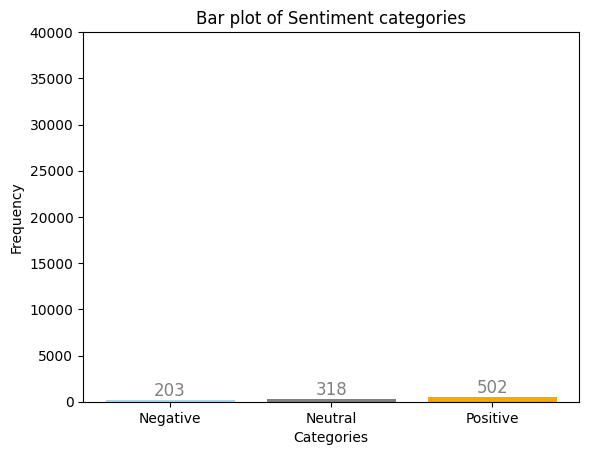

In [46]:
#[1] 감정분석 결과 막대그래프 (부정, 중립, 긍정)

print('* Negative Flag: ', dfsentiment['NegFlag'].sum())
print('* Neutral Flag: ', dfsentiment['NeuFlag'].sum())
print('* Positive Flag: ', dfsentiment['PosFlag'].sum())
print("="*50)
print('Total: ',dfsentiment['PosFlag'].sum()+dfsentiment['NeuFlag'].sum()+dfsentiment['NegFlag'].sum())


import numpy as np
import matplotlib.pyplot as plt

Negative = int(dfsentiment['NegFlag'].sum())
Neutral = int(dfsentiment['NeuFlag'].sum())
Positive = int(dfsentiment['PosFlag'].sum())

# Your three integer frequencies
freqs = [Negative, Neutral, Positive]
# freqs = [18385, 33544, 19055]

# Create labels for the bars
labels = ['Negative', 'Neutral', 'Positive']

# Create x coordinates for the bars
x = np.arange(len(labels))

# Generate the bar plot
plt.bar(x, freqs)


# Specify the colors for each category
colors = ['lightblue', 'gray', 'orange']

# Generate the bar plot with custom colors

bars = plt.bar(x, freqs, color=colors)
# Add labels to the x-axis
plt.xticks(x, labels)

# Set axis labels
plt.xlabel('Categories')
plt.ylabel('Frequency')

# Set a title for the plot
plt.title('Bar plot of Sentiment categories')
plt.ylim(0, 40000) 
# Add the frequency text within each bar
for bar, freq in zip(bars, freqs):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 2, str(freq),
             ha='center', va='bottom', fontsize=12, color='gray')


# Display the plot
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


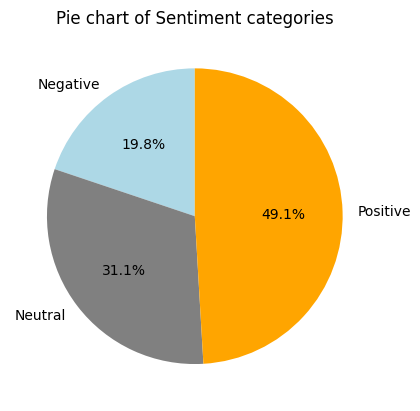

In [48]:
# [2] 감정분석 카테고리 파이차트 (비율확인용)
import numpy as np
import matplotlib.pyplot as plt

Negative = int(dfsentiment['NegFlag'].sum())
Neutral = int(dfsentiment['NeuFlag'].sum())
Positive = int(dfsentiment['PosFlag'].sum())

# Your three integer frequencies
freqs = [Negative, Neutral, Positive]

# Create labels for the segments
labels = ['Negative', 'Neutral', 'Positive']

# Specify the colors for each segment
colors = ['lightblue', 'gray', 'orange']

# Generate the pie chart with custom colors
plt.pie(freqs, labels=labels, colors=colors, autopct='%.1f%%', startangle=90)

# Set a title for the plot
plt.title('Pie chart of Sentiment categories')

# Display the plot
plt.show()

2. 한국어

In [49]:
!pip install transformers
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import pandas as pd
import nltk
nltk.download('punkt')  # Download the required NLTK data (only needed once)
from nltk.tokenize import sent_tokenize

# 감정 분석을 위한 모델과 토크나이저 불러오기
model_name = "beomi/kcbert-base"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# 엑셀 파일 읽기
df = pd.read_excel('/content/comments.xlsx', sheet_name='Korean')
#column_data = df['comment']

# Split comments into sentences
sentences = []
for comment in df['textDisplay']:
    sentences.extend(sent_tokenize(comment))

# Create a new DataFrame with the sentences
new_df = pd.DataFrame({'sentence': sentences})

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 86.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 60.3 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Some weights of the model checkpoint at beomi/kcbert-base were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initiali

In [56]:
new_df.info

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<bound method DataFrame.info of                                               sentence
0    국가의 아버지 고 박정희대통령님은 사랑하는 고 육영수여사님 잃고 국민에게 자유와 복...
1           이것을 지키고 삶을 영위하며 살아가는것이 우리국민의 사명이 곧 나라사랑이다.
2    미국인들에게 늘 하고싶던 말들인데,  한국을 대표하는 대통령으로서 미국 의회에서 저...
3                                               감격스럽다.
4    실제로 많은 한국인들이 미국의노예 노릇을 하고 있다고 비판합니다<br>윤석열대통령의...
..                                                 ...
301                         @magic90015 그럼 너는 북한공작원이냐?
302                         뭔 말 같지도 않은 소리를 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
303                       @magic90015 이그 아니야 이 부적응자야 👎
304                                    우리대통령님   멋있다 ❤❤
305                                 지지율 31프로 친일파가 ㅋㅋㅋㅋ

[306 rows x 1 columns]>